In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

In [2]:
computers = pd.read_csv('/Users/AnirbanGuha/Library/CloudStorage/OneDrive-Personal/Maven Analytics Courses/Data Science in Python - Regression/Course Materials/Data/Computers.csv')

In [3]:
computers.shape

(6259, 10)

In [4]:
target = "price"
features = [
    "speed",
    "hd",
    "ram",
    "screen",
    "ads",
    "trend"
]

#Set the feature and target variables

X = sm.add_constant(computers[features])
y = computers[target]

In [5]:
#Split the feature dataset into training and test
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2,
                                        random_state=1000)

In [6]:
#Build the model based on training dataset
model = sm.OLS(y,X).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2020.
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:14:50   Log-Likelihood:                -35883.
No. Observations:                5007   AIC:                         7.178e+04
Df Residuals:                    5000   BIC:                         7.183e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -260.8856     74.810     -3.487      0.000    -407.546    -114.225
speed          8.8712      0.235     37.680      0.000       8.410       9.333
hd             0.7004      0.036     19.661      0.000       0.631       0.770
ram           47.2883      1.344     35.182      0.000      44.653      49.923
screen       127.4771      5.106     24.968      0.000     117.468     137.486
ads            0.9781      0.064     15.308      0.000       0.853       1.103
trend        -46.7448      0.773    -60.438      0.000     -48.261     -45.229
==============================================================================
Omnibus:                     1182.552   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3357.800
Skew:                           1.235   Prob(JB):                         0.00
Kurtosis:                       6.162   Cond. No.                     8.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
#Cross-validate the model splitting the training dataset into K-Folds
kf = KFold(n_splits=5,shuffle=True,random_state=1023)

In [9]:
#Create empty lists to store the model scores
cv_r2 = []
cv_mae = []

In [10]:
#Lopp through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    #Subset data into CV_folds
    X_train, y_train  = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

    #Train the model in C_train, y_train dataset
    model = sm.OLS(y_train, X_train).fit()
    predictions = model.predict(X_val)

    #Store the scores in the appropriate lists
    cv_mae.append(mae(y_val, predictions))
    cv_r2.append(r2(y_val, predictions))

In [11]:
print('All validations MAEs:', [round(x,3) for x in cv_mae])
print(f'Cross Validation MAEs: {round(np.mean(cv_mae),3)} +- {round(np.std(cv_mae),3)}') 

All validations MAEs: [232.207, 224.938, 224.432, 223.705, 227.42]
Cross Validation MAEs: 226.541 +- 3.096


In [12]:
print('All validations R2s:', [round(x,3) for x in cv_r2])
print(f'Cross Validation R2s: {round(np.mean(cv_r2),3)} +- {round(np.std(cv_r2),3)}') 

All validations R2s: [0.721, 0.7, 0.694, 0.701, 0.714]
Cross Validation R2s: 0.706 +- 0.01


In [13]:
model.predict()

array([2131.49587327, 2056.82389297, 2825.06317026, ..., 1612.53866922,
       2910.67702601, 2693.85764649], shape=(4006,))

In [18]:
#Split the feature dataset into training and test
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2,
                                        random_state=1000)
model = sm.OLS(y, X).fit()

In [19]:
model.predict()

array([2099.987123  , 3148.58005464, 1473.53027184, ..., 3220.61479488,
       1877.45070917, 2074.24091923], shape=(4005,))

In [20]:
y

2349    2244
791     2995
2921    1344
3840    2129
5013    2904
        ... 
5742    1695
4623    1590
3103    3090
2783    2219
5357    2198
Name: price, Length: 4005, dtype: int64

<Axes: xlabel='price', ylabel='Predicted Price'>

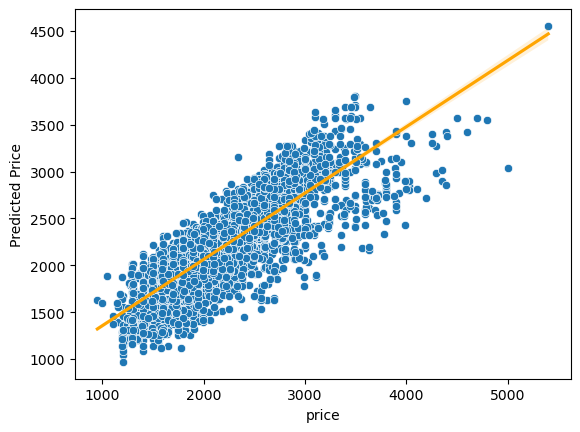

In [32]:
sns.scatterplot(x=y, y=model.predict());
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

sns.regplot(x=y, y=model.predict(), color='orange',scatter=False)